## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_combined = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.

mouse_group = mouse_study_combined.groupby('Mouse ID')

number_of_mice = mouse_group['Mouse ID'].count()

Total_mice = len(number_of_mice)

Total_mice

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.               

copy_ID_mice = mouse_study_combined.loc[mouse_study_combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

copy_ID_mice


array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 



In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_mouse = mouse_study_combined[mouse_study_combined['Mouse ID'].isin(copy_ID_mice)==False]

drop_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
mouse_study_combined.loc[mouse_study_combined['Mouse ID'].isin(['z969','k403'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [45]:
#Checking the number of mice in the clean DataFrame.

mice_clean_check = drop_mouse['Mouse ID'].value_counts()

clean_number = len(mice_clean_check)

clean_number

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_mean = drop_mouse.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
Tumor_mean

Tumor_median = drop_mouse.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
Tumor_median

Tumor_variance = drop_mouse.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
Tumor_variance

Tumor_standard = drop_mouse.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
Tumor_standard

Tumor_sem = drop_mouse.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
Tumor_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Statistics_Table = pd.DataFrame({"Mean": Tumor_mean, "Median": Tumor_median, 
                                 
                                 "Variance": Tumor_variance, "Standard Deviation": Tumor_standard, 
                                
                                "Sem": Tumor_sem })

Statistics_Table


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Using the aggregation method, produce the same summary statistics in a single line
drop_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

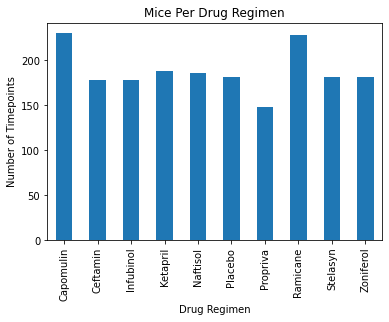

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Bar_Data = drop_mouse.groupby('Drug Regimen')['Mouse ID'].count()

Bar_Data.plot.bar()
plt.title('Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()

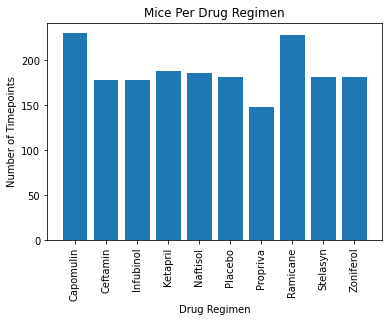

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Bar_Data = drop_mouse.groupby('Drug Regimen')['Mouse ID'].count()

plt.bar(Bar_Data.index, Bar_Data.values)

plt.title('Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)
plt.show()

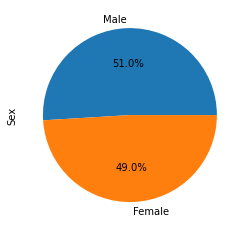

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Pie_Data = drop_mouse['Sex'].value_counts()

Pie_Data.plot(kind='pie', autopct='%1.1f%%')

plt.show()


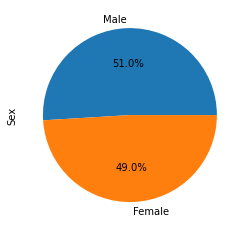

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Pie_Data.values, labels=Pie_Data.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Capomulin_Data = drop_mouse.loc[drop_mouse['Drug Regimen'] == "Capomulin",:]

#Capomulin_Data
# Start by getting the last (greatest) timepoint for each mouse
most_recent = drop_mouse.groupby(["Mouse ID"])["Timepoint"].max()
most_recent = most_recent.reset_index()
most_recent


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(most_recent, drop_mouse, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [54]:
Capomulin_Data = drop_mouse.loc[drop_mouse['Drug Regimen'] == "Capomulin",:]

Capomulin_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [55]:
Ramicane_Data = drop_mouse.loc[drop_mouse['Drug Regimen'] == "Ramicane",:]

Ramicane_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [56]:
Infubinol_Data = drop_mouse.loc[drop_mouse['Drug Regimen'] == "Infubinol",:]

Infubinol_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [57]:
Ceftamin_Data = drop_mouse.loc[drop_mouse['Drug Regimen'] == "Ceftamin",:]

Ceftamin_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [58]:
most_recent_Capomulin = Capomulin_Data.groupby(["Mouse ID"])["Timepoint"].max()
Capomulin_drug = pd.DataFrame(most_recent_Capomulin)
Capomulin_merged_df = pd.merge(most_recent_Capomulin, drop_mouse, on=["Mouse ID", "Timepoint"], how="left")
Capomulin_merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [59]:
Capomulin_treatment = Capomulin_merged_df["Tumor Volume (mm3)"]

quartiles = Capomulin_treatment.quantile([.25,.5,.75])
lower_q = quartiles[.25]
upper_q = quartiles[.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)
outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]

In [60]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_list.append(drug_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]
    print(outliers)
    
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


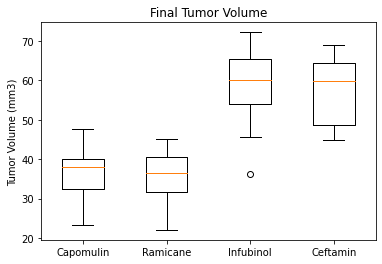

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_list, labels = treatment_list, widths = 0.5, vert = True)
plt.show()

## Line and Scatter Plots

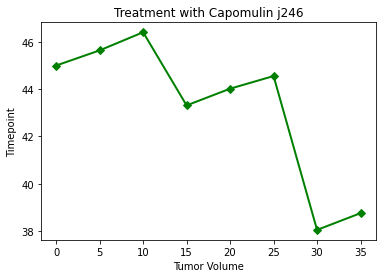

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


x_data = Capomulin_Data.loc[Capomulin_Data["Mouse ID"] == "j246",:]

x_axis = x_data["Timepoint"]
tumor_volume = x_data["Tumor Volume (mm3)"]


plt.title("Treatment with Capomulin j246")
plt.xlabel("Tumor Volume")
plt.ylabel("Timepoint")

plt.plot(x_axis, tumor_volume, marker = "D", color = "Green", linewidth = 2)

plt.show()



Text(0, 0.5, 'Mouse Weight')

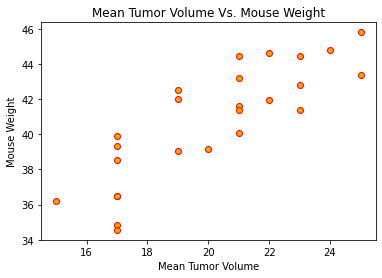

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mean_capomulin_tu = Capomulin_Data.groupby(["Mouse ID"]).mean()

plt.scatter(mean_capomulin_tu["Weight (g)"],mean_capomulin_tu["Tumor Volume (mm3)"], facecolors="Orange", edgecolors="Red")
plt.title("Mean Tumor Volume Vs. Mouse Weight")
plt.xlabel("Mean Tumor Volume")
plt.ylabel("Mouse Weight")

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = Capomulin_merged_df.iloc[:,5]
mean_tu_vol = Capomulin_merged_df.iloc[:,6]
correlation = st.pearsonr(mouse_weight,mean_tu_vol)
print(f"The correlation between mouse weight and avg tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and avg tumor volume is 0.88


The r-squared is: 0.7088568047708723


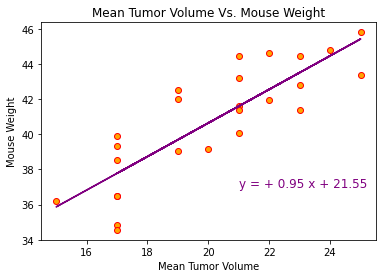

In [75]:
#linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_capomulin_tu["Weight (g)"]
y_values = mean_capomulin_tu["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_capomulin_tu["Weight (g)"], mean_capomulin_tu["Tumor Volume (mm3)"])
regress_values = mean_capomulin_tu["Weight (g)"]* slope + intercept

line_eq = f"y = + {round(slope,2)} x + {round(intercept, 2)}"

plt.scatter(mean_capomulin_tu["Weight (g)"],mean_capomulin_tu["Tumor Volume (mm3)"], facecolors="Orange", edgecolors="Red")
plt.plot(x_values, regress_values,color = "purple")
plt.annotate(line_eq, (21,37), fontsize = 12, color="purple")
plt.title("Mean Tumor Volume Vs. Mouse Weight")
plt.xlabel("Mean Tumor Volume")
plt.ylabel("Mouse Weight")
print(f"The r-squared is: {rvalue**2}")
plt.show()
